In [73]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import random

import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
import yfinance as yf
import requests

In [75]:
s = '2022-01-01'
e = '2024-03-27'

In [76]:
df = pd.read_csv("https://query.data.world/s/pzd7uazpmpyortmg6fsuxiaoizllgu?dws=00000", encoding='ISO-8859-1')
display(df.head())

,Public Company Name (As Listed on Exchange),B Corp Impact Data ID,Ticker 1,Ticker 2,Ticker 3,IPO Year,Year Delisted,Year Certified,Public Listing Status,Year Decertified
0,"Allbirds, Inc.",001C000001SGhnyIAD,NASDAQGS:BIRD,NaN,NaN,2021.0,NaN,2016.0,active,NaN
1,Amalgamated Financial,001C000001K16JSIAZ,NASDAQGM:AMAL,NaN,NaN,2018.0,NaN,2017.0,active,NaN
2,"AppHarvest, Inc.",0013b00001o41JFAAY,NASDAQGS:APPH,NaN,NaN,2020.0,NaN,2019.0,delisted,2023.0
3,Arezzo&Co,0013b00001qHFddAAG,BOVESPA:ARZZ3,NaN,NaN,2011.0,NaN,2022.0,active,NaN
4,Arowana International,001C000001ZzPK4IAN,ASX: AWN,NaN,NaN,2013.0,2021.0,2018.0,delisted,NaN


In [77]:
df.drop(['B Corp Impact Data ID', 'Ticker 2', 'Ticker 3'], axis=1, inplace = True)
print(len(df))
df.dropna(axis=0, subset=['Public Company Name (As Listed on Exchange)'], inplace=True)
print(len(df))

999
68


In [78]:
display(df[df['Public Listing Status'] == 'delisted'])

,Public Company Name (As Listed on Exchange),Ticker 1,IPO Year,Year Delisted,Year Certified,Public Listing Status,Year Decertified
2,"AppHarvest, Inc.",NASDAQGS:APPH,2020.0,NaN,2019.0,delisted,2023.0
4,Arowana International,ASX: AWN,2013.0,2021.0,2018.0,delisted,NaN
14,Freshlocal Solutions,TSE: LOCL,2019.0,2021.0,2013.0,delisted,NaN


In [79]:
temp = df.copy()
temp = temp[temp['Public Listing Status'] == 'active']

temp['Ticker 1'].replace(": ", ":", regex=True, inplace=True)


print(len(temp))
temp['Exchange'] = temp['Ticker 1'].str.split(":").str[0]
temp['Ticker2'] = temp['Ticker 1'].str.split(":").str[1]
temp.dropna(subset=["Ticker2"], inplace=True) # Remove any NaN tickers

display(temp.head())

65


,Public Company Name (As Listed on Exchange),Ticker 1,IPO Year,Year Delisted,Year Certified,Public Listing Status,Year Decertified,Exchange,Ticker2
0,"Allbirds, Inc.",NASDAQGS:BIRD,2021.0,NaN,2016.0,active,NaN,NASDAQGS,BIRD
1,Amalgamated Financial,NASDAQGM:AMAL,2018.0,NaN,2017.0,active,NaN,NASDAQGM,AMAL
3,Arezzo&Co,BOVESPA:ARZZ3,2011.0,NaN,2022.0,active,NaN,BOVESPA,ARZZ3
5,Australian Ethical Investment Ltd.,ASX:AEF,2002.0,NaN,2014.0,active,NaN,ASX,AEF
6,Benefit Systems S.A.,WSE:BFT,2013.0,NaN,2018.0,active,NaN,WSE,BFT


In [80]:
display(temp.loc[40:,:])

,Public Company Name (As Listed on Exchange),Ticker 1,IPO Year,Year Delisted,Year Certified,Public Listing Status,Year Decertified,Exchange,Ticker2
41,Urb-it AB (publ),OM:URBIT,2017.0,NaN,2020.0,active,NaN,OM,URBIT
42,Vantea SMART S.p.A.,BIT:VNT,2021.0,NaN,2022.0,active,NaN,BIT,VNT
43,Viña Concha y Toro S.A.,SNSE:CONCHATORO,NaN,NaN,2021.0,active,NaN,SNSE,CONCHATORO
44,"Vital Farms, Inc.",NASDAQGM:VITL,2020.0,NaN,2015.0,active,NaN,NASDAQGM,VITL
45,VivoPower International PLC,NASDAQCM:VVPR,2016.0,NaN,2018.0,active,NaN,NASDAQCM,VVPR
46,Volpara Health Technologies Limited,ASX:VHT,2016.0,NaN,2022.0,active,NaN,ASX,VHT
47,Warby Parker Inc.,NYSE:WRBY,2021.0,NaN,2011.0,active,NaN,NYSE,WRBY
48,Weleda AG Group,OTC-X:BEKB:Weleda N-PS,NaN,NaN,2021.0,active,NaN,OTC-X,BEKB
49,Zevia PBC,NYSE:ZVIA,2021.0,NaN,2021.0,active,NaN,NYSE,ZVIA
51,Aussie Broadband Ltd,ASX:ABB,2020.0,NaN,2023.0,active,NaN,ASX,ABB


### Stocks are from Global Exchanges - build and maintain an exchange conversion dictionary to interface with Yahoo Finance

In [81]:
exchange_dict = {'ASX': '.XA', 
                 'WSE': '.WA',
                 'BOVESPA': '.SA',
                 'ETHEX': '',
                 'TSX': '.TO',
                 'ENXTPA': '.PA',
                 'BME': '.MC',
                 'ENXTBR': '.BR',
                 'KLSE': '.KL',
                 'LSE': '.AQ',
                 'TWSE': '.TW',
                 'NZSE': '.NZ',
                 'SGX': '.SI',
                 'BIT': '.MI',
                 'TASE': '.TA',
                 'XMIL': '.MI',
                 'NZE': '.NZ',
                 'BVMF': '.SA',
                 'HKG': '.HK',
                 'LON': '.L',
                 'MIL': '.MI',
                 'MOVI3': '.SA',
                 'TSE': '.T',
                 'BRK': '.L',
                 'SNSE': '.SN',
                 'MOVIDA B3': '.SA',
                 'NYSE': '',
                 'NASDAQGS': '',
                 'NASDAQGM': '',
                 'NASDAQCM': ''
                }

exchange_map = {exchanges: extention
                 for exchanges, extention in exchange_dict.items()
                 for exchange in exchanges}

temp['Intl Extention'] = temp['Exchange'].map(exchange_map)

In [82]:
temp['Ticker'] = temp['Ticker2'] + temp['Intl Extention'] 
mask = temp['Ticker'].isna()

# Check to see if we missed any:
temp[mask]

,Public Company Name (As Listed on Exchange),Ticker 1,IPO Year,Year Delisted,Year Certified,Public Listing Status,Year Decertified,Exchange,Ticker2,Intl Extention,Ticker
19,Heidelberg District Community Enterprise Limited,NSX:EIC,2019.0,NaN,2019.0,active,NaN,NSX,EIC,NaN,NaN
36,SIDERPERU,BVL:SIDERC1,2006.0,NaN,2022.0,active,NaN,BVL,SIDERC1,NaN,NaN
41,Urb-it AB (publ),OM:URBIT,2017.0,NaN,2020.0,active,NaN,OM,URBIT,NaN,NaN
48,Weleda AG Group,OTC-X:BEKB:Weleda N-PS,NaN,NaN,2021.0,active,NaN,OTC-X,BEKB,NaN,NaN
56,Vinedos Emiliana S.A.,XSGO:EMILIANA,1996.0,NaN,2023.0,active,NaN,XSGO,EMILIANA,NaN,NaN


In [83]:
#Find datafeed issues
tickers = temp['Ticker'].to_list()

count = 0
for t in tickers:
    try:
        ticker = yf.Ticker(t)
        info = None
    except:
        count +=1
        print(f"Cannot get info of {t}, it probably does not exist")

print("Total nans =", count, "which is", round(count/temp.shape[0],2)*100, '% of the total')


Cannot get info of nan, it probably does not exist
Cannot get info of nan, it probably does not exist
Cannot get info of nan, it probably does not exist
Cannot get info of nan, it probably does not exist
Cannot get info of nan, it probably does not exist
Total nans = 5 which is 8.0 % of the total


In [84]:
# Remove Nans from stock universe:

b_corp_df = temp[-mask].copy()
display(b_corp_df.head())


,Public Company Name (As Listed on Exchange),Ticker 1,IPO Year,Year Delisted,Year Certified,Public Listing Status,Year Decertified,Exchange,Ticker2,Intl Extention,Ticker
0,"Allbirds, Inc.",NASDAQGS:BIRD,2021.0,NaN,2016.0,active,NaN,NASDAQGS,BIRD,,BIRD
1,Amalgamated Financial,NASDAQGM:AMAL,2018.0,NaN,2017.0,active,NaN,NASDAQGM,AMAL,,AMAL
3,Arezzo&Co,BOVESPA:ARZZ3,2011.0,NaN,2022.0,active,NaN,BOVESPA,ARZZ3,.SA,ARZZ3.SA
5,Australian Ethical Investment Ltd.,ASX:AEF,2002.0,NaN,2014.0,active,NaN,ASX,AEF,.XA,AEF.XA
6,Benefit Systems S.A.,WSE:BFT,2013.0,NaN,2018.0,active,NaN,WSE,BFT,.WA,BFT.WA


In [85]:
isolate_us = False
if isolate_us:

    exchanges = set(temp['Exchange'])
    print(exchanges)
    us_ex = ['NYSE', 'NASDAQGS','NASDAQGM', 'NASDAQCM']
    us = temp[temp['Exchange'].isin(us_ex)]
    print("Isolating US Companies")
    display(us.head())


### List of Companies with B-Corp Subsidiaries
Unilever (NYSE: UN): (Pukka (UK), Mãe Terra (Brazil), Sir Kensington’s (US), Ben & Jerry’s (US), Olly Nutrition (US), Seventh Generation (US), Sundial (US), T2 Tea (Australia), Graze (UK))

B2W (B3: BTOW3): Courrieros (Brazil)

Grupo Soma (B3: SOMA3): Companhia Hering (Brazil)

Arezzo&Co (B3: ARZZ3): Reserva (Brazil)

Procter & Gamble (NYSE: PG): (New Chapter (US))

AB Inbev: (4 Pines Brewing Company)

Banco Estado: (Banco Estado Microempresas, Caja Vecina)

Coca-Cola: (Innocent Drinks)

Fairfax Financial: (The Redwoods Group)

Gap: (Athleta, Hill City)

Kikkoman: (Country Life)

Lactalis: (Stonyfield Farm)

Land O’ Lakes: (Vermonta Creamery)

Nestle: (Essential Living Foods, Garden of Life, Lily's Kitchen)

Oppenheimer Funds Inc.: (SNW Asset Management)

Rakuten: (OverDrive)

The Hain Celestial Group: (Ella’s Kitchen)

Vina Concha y Toro: (Fetzer Vineyards)


Hortfruti S.A.: Hortifruti Chile

Danone SA: (Danone North America, Alpro, Danone Waters of America, Danone Canada, -Aguas Danone Argentina, Bledina, Danone Aqua Indonesia, Danone Egypt, Danone Iberia, Danone Manifesto Ventures, Danone UK, Grameen Danone Foods, Happy Family, Les 2 Vaches, Danone Waters Germany, Danone Dairy Ireland, Danone Waters Spain, Danone Netherlands, Danone Dairy Belgium, Nutricia Bago, Danone ELN Greater China, Danone Japan, Volvic, Danone Brazil)

Caixabank (Imagin Ban)

Banco Sabadell (Sogeviso)

iSun (SunCommon)

In [86]:
add_subs = True
public_subs = ['UL', 'SOMA3.SA', 'ABI.BR', 'PG', 'FFH.TO', 'KO', 'GPS', 'KIK.F', 'NESN.SW', 'CONCHATORO.SN', 'ARZZ3.SA',
               'OPY', '4755.T', 'HAIN', 'DANOY', 'CABK.MC', 'ISUN']

In [87]:
def get_stock_data (df):
    tickers_list = df['Ticker'].tolist()
    if add_subs:
        tickers_list = tickers_list + public_subs
    tickers_data= {}
    
    for ticker in tickers_list:
        ticker_object = yf.Ticker(ticker)
        
        #convert info() output from dictionary to dataframe
        temp = pd.DataFrame.from_dict(ticker_object.info, orient="index")
        temp.reset_index(inplace=True)
        temp.columns = ["Attribute", "Recent"]

        # add (ticker, dataframe) to main dictionary
        tickers_data[ticker] = temp

    return tickers_data
        
        

In [88]:
if isolate_us:
    load_stock_data = get_stock_data (us)
else:
    load_stock_data = get_stock_data (b_corp_df)
    
print("Number of Stock Records Loaded", len(load_stock_data))

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SZL.XA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SZL.XA&crumb=Aaw1n7vaHNm


Number of Stock Records Loaded 71


In [89]:
# Clean df:
stock_data = pd.concat(load_stock_data) #turn from dict to df
stock_data = stock_data.reset_index()

del stock_data["level_1"] # clean up unnecessary column
stock_data.columns = ["Ticker", "Attribute", "Recent"] # update column names


attr_to_keep = ['shortName', 'longName', 'industry', 'sector','previousClose', 'sharesOutstanding', 'impliedSharesOutstanding',
               'marketCap',  'currency', 'country', 'website', 'enterpriseValue',
                'trailingEps', 'forwardEps', 'enterprisetoEbitda', 'ebitda', 'grossMargins', 'ebitdaMargins', 'operatingMargins']


stock_data = stock_data[stock_data["Attribute"].isin(attr_to_keep)].reset_index()
del stock_data["index"] # clean up unnecessary column



display(stock_data.head(15))

,Ticker,Attribute,Recent
0,BIRD,country,United States
1,BIRD,website,https://www.allbirds.com
2,BIRD,industry,Apparel Retail
3,BIRD,sector,Consumer Cyclical
4,BIRD,previousClose,0.6439
5,BIRD,marketCap,94665288
6,BIRD,currency,USD
7,BIRD,enterpriseValue,65798716
8,BIRD,sharesOutstanding,102641000
9,BIRD,impliedSharesOutstanding,155188992


In [90]:
print("Number of Stocks:", len(stock_data['Ticker'].unique()))
display(stock_data['Ticker'].unique())

Number of Stocks: 68


array(['BIRD', 'AMAL', 'ARZZ3.SA', 'AEF.XA', 'BFT.WA', 'BIO.XA',
       'CWEB.TO', 'CLSA3.SA', 'MLMFI.PA', 'COUR', 'FLOW.TO', 'FREY.PA',
       'GFI.NZ', 'GROV', 'HAN.MC', 'HLZ.MC', 'INCLU.BR', 'IBAB.BR',
       'KPG.XA', 'KCT.AQ', 'KMD.NZ', 'LMND', 'LFG.XA', 'MOVI3.SA',
       'NTCO3.SA', '2897.TW', '1H2.SI', 'ALQP.PA', 'RETI.MI', '6088.T',
       'SML.NZ', 'COCO', 'VNT.MI', 'CONCHATORO.SN', 'VITL', 'VVPR',
       'VHT.XA', 'WRBY', 'ZVIA', 'ABB.XA', 'TIME.MI', 'CVT.NZ', 'DOX.MI',
       'SOMA3.SA', '1112.HK', 'HMGS.TA', '1346.HK', '0973.HK', 'MME.XA',
       'MPR.XA', 'TENG.L', 'TPX.L', 'XSG.L', 'XHS.MI', 'UL', 'ABI.BR',
       'PG', 'FFH.TO', 'KO', 'GPS', 'KIK.F', 'NESN.SW', 'OPY', '4755.T',
       'HAIN', 'DANOY', 'CABK.MC', 'ISUN'], dtype=object)

In [91]:
stock_data_filtered = stock_data.pivot(columns = 'Attribute', index='Ticker', values='Recent')
stock_data_filtered.columns

# More info:
#stock_data_filtered = stock_data_filtered[['shortName', 'longName','country', 'currency', 'previousClose',
#                                           'sharesOutstanding', 'impliedSharesOutstanding','marketCap', 'enterpriseValue',
#                                           'ebitda', 'forwardEps',  'trailingEps', 'grossMargins', 'operatingMargins', 'ebitdaMargins',
#                                             'industry', 'sector', 'website']]
# Only essential info:
stock_data_filtered = stock_data_filtered[['shortName', 'longName','country', 'currency', 'previousClose',
                                           'impliedSharesOutstanding','marketCap','industry', 'sector', 'website']]

display(stock_data_filtered.head(10))

Attribute,shortName,longName,country,currency,previousClose,impliedSharesOutstanding,marketCap,industry,sector,website
Ticker,,,,,,,,,,
0973.HK,L'OCCITANE,L'Occitane International S.A.,Luxembourg,HKD,32.0,1472169984,46078918656,Household & Personal Products,Consumer Defensive,https://group.loccitane.com
1112.HK,H&H INTL HLDG,Health and Happiness (H&H) International Holdi...,Hong Kong,HKD,10.74,645561024,6997881344,Packaged Foods,Consumer Defensive,https://www.hh.global
1346.HK,LEVER STYLE,Lever Style Corporation,Hong Kong,HKD,0.98,645899008,613536000,Apparel Manufacturing,Consumer Cyclical,https://www.leverstyle.com
1H2.SI,$ Olive Tree,Olive Tree Estates Limited,Singapore,SGD,0.078,124756000,9035910,Real Estate - Diversified,Real Estate,https://www.olivetreeestates.com
2897.TW,O-BANK CO LTD,"O-Bank Co., Ltd.",Taiwan,TWD,9.98,2735620096,27219419136,Banks - Regional,Financial Services,https://www.o-bank.com
4755.T,RAKUTEN GROUP INC,"Rakuten Group, Inc.",Japan,JPY,858.1,2143219968,1839311355904,Internet Retail,Consumer Cyclical,https://global.rakuten.com/corp
6088.T,SIGMAXYZ HOLDINGS INC,SIGMAXYZ Holdings Inc.,Japan,JPY,1662.0,43742300,73137127424,Specialty Business Services,Industrials,https://www.sigmaxyz.com
ABB.XA,AUSSIEBAND FPO,Aussie Broadband Limited,Australia,AUD,3.52,NaN,NaN,NaN,NaN,https://www.aussiebroadband.com.au
ABI.BR,AB INBEV,Anheuser-Busch InBev SA/NV,Belgium,EUR,55.88,282105984,108957982720,Beverages - Brewers,Consumer Defensive,https://www.ab-inbev.com


### Incorporate exchange rates to translate price and market cap into USD

In [92]:
# Get avaialable currencies
currency_dict = {}

url = "https://currency-conversion-and-exchange-rates.p.rapidapi.com/symbols"

    #headers = {"X-RapidAPI-Key": "af4b092441msh3f4304a0bce0366p1680a3jsn93d4c3a0659f",
headers = {"X-RapidAPI-Key": "884638c782msh3dc9c5784730cc0p1a0f42jsnf54c2327e84c",
    "X-RapidAPI-Host": "currency-conversion-and-exchange-rates.p.rapidapi.com"
          }

response = requests.get(url, headers=headers)

api_data = response.json()
#print(api_data)

    
for symbol, curr in api_data['symbols'].items():
    currency_dict[symbol] = [curr, 0]

#currency_dict
    

In [93]:
## Access Exchange Rates:

url = "https://currency-conversion-and-exchange-rates.p.rapidapi.com/latest"

#querystring = {"from":"USD","to":"EUR,GBP"}
querystring = {'base':'USD', 'date': '2024-02-01'}

    #headers = {"X-RapidAPI-Key": "af4b092441msh3f4304a0bce0366p1680a3jsn93d4c3a0659f",
headers = {"X-RapidAPI-Key": "884638c782msh3dc9c5784730cc0p1a0f42jsnf54c2327e84c",
    "X-RapidAPI-Host": "currency-conversion-and-exchange-rates.p.rapidapi.com"
          }

response = requests.get(url, headers=headers, params=querystring)

exch_data = response.json()

#for key in exch_data: 
#    print(key,":", exch_data[key]) 

In [94]:
## Combine date from exch_data with names / symbols in currency_dict:

for symbol, rate in exch_data['rates'].items():
    for key in currency_dict.keys():
        if symbol == key:
            currency_dict[key][1] = rate

In [95]:
currency_dict

{'ANG': ['Netherlands Antillean Guilder', 1.801828],
 'SVC': ['Salvadoran Colón', 8.747767],
 'CAD': ['Canadian Dollar', 1.354235],
 'XCD': ['East Caribbean Dollar', 2.70255],
 'MVR': ['Maldivian Rufiyaa', 15.449844],
 'HRK': ['Croatian Kuna', 6.882375],
 'AUD': ['Australian Dollar', 1.518199],
 'MWK': ['Malawian Kwacha', 1741.000178],
 'XAG': ['Silver (troy ounce)', 0.037162],
 'MAD': ['Moroccan Dirham', 10.062499],
 'PHP': ['Philippine Peso', 56.68025],
 'NAD': ['Namibian Dollar', 18.660223],
 'GNF': ['Guinean Franc', 8594.02331],
 'KES': ['Kenyan Shilling', 129.999624],
 'MZN': ['Mozambican Metical', 63.504494],
 'BTN': ['Bhutanese Ngultrum', 83.43332],
 'MGA': ['Malagasy Ariary', 4355.000052],
 'AZN': ['Azerbaijani Manat', 1.69907],
 'XAU': ['Gold (troy ounce)', 0.000436],
 'RON': ['Romanian Leu', 4.584805],
 'CHF': ['Swiss Franc', 0.90137],
 'EGP': ['Egyptian Pound', 47.351298],
 'BSD': ['Bahamian Dollar', 0.999797],
 'TWD': ['New Taiwan Dollar', 32.058902],
 'GGP': ['Guernsey Pou

In [96]:
## Add exhange rates and calculate USD equivalents:

#exchange_map = {exchanges: extention
#                 for exchanges, extention in exchange_dict.items()
#                 for exchange in exchanges}


currency_map = {symbols: rate
                 for symbols, name in currency_dict.items()
                 for rate in name}



stock_data_filtered['USDExchangeRate'] = stock_data_filtered['currency'].map(currency_map)


In [97]:
# Check to see that exchange rates mapped correctly:
stock_data_filtered.head(15)

Attribute,shortName,longName,country,currency,previousClose,impliedSharesOutstanding,marketCap,industry,sector,website,USDExchangeRate
Ticker,,,,,,,,,,,
0973.HK,L'OCCITANE,L'Occitane International S.A.,Luxembourg,HKD,32.0,1472169984,46078918656,Household & Personal Products,Consumer Defensive,https://group.loccitane.com,7.828650
1112.HK,H&H INTL HLDG,Health and Happiness (H&H) International Holdi...,Hong Kong,HKD,10.74,645561024,6997881344,Packaged Foods,Consumer Defensive,https://www.hh.global,7.828650
1346.HK,LEVER STYLE,Lever Style Corporation,Hong Kong,HKD,0.98,645899008,613536000,Apparel Manufacturing,Consumer Cyclical,https://www.leverstyle.com,7.828650
1H2.SI,$ Olive Tree,Olive Tree Estates Limited,Singapore,SGD,0.078,124756000,9035910,Real Estate - Diversified,Real Estate,https://www.olivetreeestates.com,1.348600
2897.TW,O-BANK CO LTD,"O-Bank Co., Ltd.",Taiwan,TWD,9.98,2735620096,27219419136,Banks - Regional,Financial Services,https://www.o-bank.com,32.058902
4755.T,RAKUTEN GROUP INC,"Rakuten Group, Inc.",Japan,JPY,858.1,2143219968,1839311355904,Internet Retail,Consumer Cyclical,https://global.rakuten.com/corp,151.303965
6088.T,SIGMAXYZ HOLDINGS INC,SIGMAXYZ Holdings Inc.,Japan,JPY,1662.0,43742300,73137127424,Specialty Business Services,Industrials,https://www.sigmaxyz.com,151.303965
ABB.XA,AUSSIEBAND FPO,Aussie Broadband Limited,Australia,AUD,3.52,NaN,NaN,NaN,NaN,https://www.aussiebroadband.com.au,1.518199
ABI.BR,AB INBEV,Anheuser-Busch InBev SA/NV,Belgium,EUR,55.88,282105984,108957982720,Beverages - Brewers,Consumer Defensive,https://www.ab-inbev.com,0.922660


In [98]:
# Calculate USD price and USD marketcap
stock_data_filtered['previousCloseUSD'] = stock_data_filtered['previousClose'] / stock_data_filtered['USDExchangeRate']
stock_data_filtered['marketCapUSD'] = stock_data_filtered['marketCap'] / stock_data_filtered['USDExchangeRate']
stock_data_filtered.head(20)

Attribute,shortName,longName,country,currency,previousClose,impliedSharesOutstanding,marketCap,industry,sector,website,USDExchangeRate,previousCloseUSD,marketCapUSD
Ticker,,,,,,,,,,,,,
0973.HK,L'OCCITANE,L'Occitane International S.A.,Luxembourg,HKD,32.0,1472169984,46078918656,Household & Personal Products,Consumer Defensive,https://group.loccitane.com,7.828650,4.08755,5885934184.821138
1112.HK,H&H INTL HLDG,Health and Happiness (H&H) International Holdi...,Hong Kong,HKD,10.74,645561024,6997881344,Packaged Foods,Consumer Defensive,https://www.hh.global,7.828650,1.371884,893880981.267524
1346.HK,LEVER STYLE,Lever Style Corporation,Hong Kong,HKD,0.98,645899008,613536000,Apparel Manufacturing,Consumer Cyclical,https://www.leverstyle.com,7.828650,0.125181,78370600.29507
1H2.SI,$ Olive Tree,Olive Tree Estates Limited,Singapore,SGD,0.078,124756000,9035910,Real Estate - Diversified,Real Estate,https://www.olivetreeestates.com,1.348600,0.057838,6700215.037817
2897.TW,O-BANK CO LTD,"O-Bank Co., Ltd.",Taiwan,TWD,9.98,2735620096,27219419136,Banks - Regional,Financial Services,https://www.o-bank.com,32.058902,0.311302,849044023.2794
4755.T,RAKUTEN GROUP INC,"Rakuten Group, Inc.",Japan,JPY,858.1,2143219968,1839311355904,Internet Retail,Consumer Cyclical,https://global.rakuten.com/corp,151.303965,5.671365,12156398914.621965
6088.T,SIGMAXYZ HOLDINGS INC,SIGMAXYZ Holdings Inc.,Japan,JPY,1662.0,43742300,73137127424,Specialty Business Services,Industrials,https://www.sigmaxyz.com,151.303965,10.984511,483378789.339724
ABB.XA,AUSSIEBAND FPO,Aussie Broadband Limited,Australia,AUD,3.52,NaN,NaN,NaN,NaN,https://www.aussiebroadband.com.au,1.518199,2.318537,NaN
ABI.BR,AB INBEV,Anheuser-Busch InBev SA/NV,Belgium,EUR,55.88,282105984,108957982720,Beverages - Brewers,Consumer Defensive,https://www.ab-inbev.com,0.922660,60.564021,118091152450.523483


## Filter Universe of Stocks by USD MarketCap

In [99]:
def filter_index(df, size=True, num=True, size_thresh = 1000000000, num_thresh = 20):
    temp = df.copy()
    if size == True:
        temp = temp[temp['marketCapUSD'] >= size_thresh]
    
    if num == True:
        temp.sort_values(by=['marketCapUSD'], ascending=False, inplace = True)
        temp = temp.iloc[0:num_thresh,:]
            
    if 'ABI.BR' in temp.index:
        temp.loc['ABI.BR','impliedSharesOutstanding'] = 1982790000
    
    return temp



In [100]:
stock_index_top20 = filter_index(stock_data_filtered, size = False, num_thresh=20)
stock_index_top30 = filter_index(stock_data_filtered, size = False, num_thresh=30)
stock_index_over1b = filter_index(stock_data_filtered, size = True, num=False, size_thresh=1000000000)

print(stock_index_top20.shape, stock_index_top30.shape, stock_index_over1b.shape )

(20, 13) (30, 13) (21, 13)


In [29]:
#stock_index_top30.loc['ABI.BR']

In [30]:
stock_index_top30['currency']

Ticker
0973.HK          HKD
NTCO3.SA         BRL
BFT.WA           PLN
COUR             USD
WRBY             USD
COCO             USD
ARZZ3.SA         BRL
LMND             USD
SOMA3.SA         BRL
VITL             USD
FREY.PA          EUR
CONCHATORO.SN    CLP
1112.HK          HKD
2897.TW          TWD
AMAL             USD
MOVI3.SA         BRL
6088.T           JPY
IBAB.BR          EUR
KMD.NZ           NZD
CLSA3.SA         BRL
INCLU.BR         EUR
CVT.NZ           NZD
BIRD             USD
ALQP.PA          EUR
SML.NZ           NZD
1346.HK          HKD
ZVIA             USD
HLZ.MC           EUR
GROV             USD
CWEB.TO          CAD
Name: currency, dtype: object

### Set Index and Get Price History

In [101]:
stock_index = stock_index_top30.copy()
start_date = s
end_date = e

In [102]:
def get_price_history2 (df, start = start_date, end=end_date):
    tickers_list = df.index.tolist()
    tickers_data= {}
    first_object = yf.Ticker(tickers_list[0])
    
    prices = pd.DataFrame.from_dict(first_object.history(start=start, end=end, interval = "1d"))
    prices.drop(['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
    prices.columns = [tickers_list[0]]

    
    for ticker in tickers_list[1:]:
        ticker_object = yf.Ticker(ticker)
        try:
            temp = pd.DataFrame.from_dict(ticker_object.history(start=start, end=end, interval = "1d"))
            temp.drop(['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
            temp.columns = [ticker]
            prices = prices.merge(temp, how="outer", left_index=True, right_index=True)
        except:
            continue
    
    
    # Collapse date across international zones:
    prices.index = pd.to_datetime(prices.index).date
      
    prices = prices.groupby(prices.index).ffill() 
    prices = prices.groupby(prices.index).bfill()
    prices = prices.groupby(prices.index).last()
    
    
    return prices

In [103]:
price_history_df = get_price_history2 (stock_index)
stock_universe = list(price_history_df.columns)
stock_universe

['PG',
 'NESN.SW',
 'KO',
 'UL',
 'ABI.BR',
 'DANOY',
 'CABK.MC',
 'FFH.TO',
 '4755.T',
 'KIK.F',
 'GPS',
 '0973.HK',
 'NTCO3.SA',
 'BFT.WA',
 'COUR',
 'WRBY',
 'COCO',
 'ARZZ3.SA',
 'LMND',
 'SOMA3.SA',
 'VITL',
 'FREY.PA',
 'CONCHATORO.SN',
 '1112.HK',
 '2897.TW',
 'AMAL',
 'HAIN',
 'MOVI3.SA',
 '6088.T',
 'IBAB.BR']

In [104]:
display(price_history_df.head())


,PG,NESN.SW,KO,UL,ABI.BR,DANOY,CABK.MC,FFH.TO,4755.T,KIK.F,...,VITL,FREY.PA,CONCHATORO.SN,1112.HK,2897.TW,AMAL,HAIN,MOVI3.SA,6088.T,IBAB.BR
2022-01-02,NaN,123.109848,NaN,NaN,54.588657,NaN,1.977290,NaN,NaN,0.223547,...,NaN,28.810972,NaN,10.434152,7.413091,NaN,NaN,NaN,NaN,14.870898
2022-01-03,154.045670,123.376602,55.391403,49.771736,55.126526,11.648307,2.022397,NaN,1153.000000,0.223547,...,18.309999,29.694746,1208.541504,10.558157,7.403813,16.169909,42.660000,13.780937,1236.895020,14.637018
2022-01-04,154.584702,120.042099,56.316158,49.532364,54.764690,11.956317,2.015016,613.244934,1187.728882,0.226652,...,18.180000,29.164482,1203.634399,10.629018,7.403813,16.284922,43.029999,13.564058,1166.818604,14.578547
2022-01-05,155.284500,119.775337,56.783195,49.440289,53.923660,11.872313,2.101127,612.910339,1173.837402,0.231309,...,17.570000,29.164482,1234.558716,11.107323,7.431647,16.313683,42.639999,12.642316,1099.622192,14.598038
2022-01-06,153.979477,118.574913,56.484287,48.952335,54.256161,11.900314,2.156895,620.654541,1143.077393,0.217338,...,18.290001,29.164482,1249.927979,10.877028,7.440926,16.773760,42.509998,12.597132,1095.302368,14.364158


In [105]:
def get_country_info(price_df, info_df):
    tickers_list = price_df.columns
    
    #access currency, impliedSharesOutstanding (local currency): ## HAVE TO REVIEW FOR STOCK CHANGES
    currencies = []
    implied_SO = []
    for col in price_df.columns:
        idx = np.where(info_df.index == col)
        currencies.append(info_df.iloc[idx]['currency'].values[0])
        implied_SO.append(info_df.iloc[idx]['impliedSharesOutstanding'].values[0])
        
    for i in range(len(price_df.columns)):
        col = price_df.columns[i]
        price_df[col+'_currency'] = currencies[i]
        price_df[col+'_SO'] = implied_SO[i]
    
    return price_df, currencies
     

In [106]:
price_and_info_df, index_currencies = get_country_info(price_history_df, stock_index)

In [107]:
price_and_info_df.columns

Index(['PG', 'NESN.SW', 'KO', 'UL', 'ABI.BR', 'DANOY', 'CABK.MC', 'FFH.TO',
       '4755.T', 'KIK.F', 'GPS', '0973.HK', 'NTCO3.SA', 'BFT.WA', 'COUR',
       'WRBY', 'COCO', 'ARZZ3.SA', 'LMND', 'SOMA3.SA', 'VITL', 'FREY.PA',
       'CONCHATORO.SN', '1112.HK', '2897.TW', 'AMAL', 'HAIN', 'MOVI3.SA',
       '6088.T', 'IBAB.BR', 'PG_currency', 'PG_SO', 'NESN.SW_currency',
       'NESN.SW_SO', 'KO_currency', 'KO_SO', 'UL_currency', 'UL_SO',
       'ABI.BR_currency', 'ABI.BR_SO', 'DANOY_currency', 'DANOY_SO',
       'CABK.MC_currency', 'CABK.MC_SO', 'FFH.TO_currency', 'FFH.TO_SO',
       '4755.T_currency', '4755.T_SO', 'KIK.F_currency', 'KIK.F_SO',
       'GPS_currency', 'GPS_SO', '0973.HK_currency', '0973.HK_SO',
       'NTCO3.SA_currency', 'NTCO3.SA_SO', 'BFT.WA_currency', 'BFT.WA_SO',
       'COUR_currency', 'COUR_SO', 'WRBY_currency', 'WRBY_SO', 'COCO_currency',
       'COCO_SO', 'ARZZ3.SA_currency', 'ARZZ3.SA_SO', 'LMND_currency',
       'LMND_SO', 'SOMA3.SA_currency', 'SOMA3.SA_SO', 'VI

### Get historical exchange rates

In [108]:
def get_historical_exchange (price_df, currencies):
    #currencies = list(set(currencies))
    
    querystring = {"base":"USD"}

    #headers = {"X-RapidAPI-Key": "af4b092441msh3f4304a0bce0366p1680a3jsn93d4c3a0659f",
    headers = {"X-RapidAPI-Key": "884638c782msh3dc9c5784730cc0p1a0f42jsnf54c2327e84c",
        "X-RapidAPI-Host": "currency-conversion-and-exchange-rates.p.rapidapi.com"
              }
    daily_rate_df = pd.DataFrame()
    
    for idx in price_df.index:
        loc = np.where(price_df.index == idx)
        url = "https://currency-conversion-and-exchange-rates.p.rapidapi.com/" + str(idx)
        response = requests.get(url, headers=headers, params=querystring)
        response = response.json()
        
        daily_df = pd.DataFrame(response)
        daily_df = daily_df[['date', 'rates']].reset_index()
        daily_df = daily_df.pivot(columns='index', index='date', values='rates')

        daily_rate_df = pd.concat([daily_rate_df, daily_df], axis=0)
        #display(daily_rate_df)
        
    daily_rate_df.index = pd.to_datetime(daily_rate_df.index).date
    return daily_rate_df


In [109]:
run_api = False

In [110]:
import warnings
warnings.filterwarnings("ignore")

ext = str(dt.today().year) + "_" + str(dt.today().month) + "_" + str(dt.today().day)+ "_" + str(dt.today().hour)
filename = "daily_rates_df" + ext + ".csv"

if run_api:
    daily_rates_df = get_historical_exchange(price_and_info_df, index_currencies)
    daily_rates_df.to_csv(filename)
else:
    daily_rates_df = pd.read_csv("daily_rates_df_2022_2024_3_28_12.csv")
    daily_rates_df.set_index("Date", inplace=True)
    daily_rates_df.index = pd.to_datetime(daily_rates_df.index).date

In [111]:
daily_rates_df.head()

,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
2022-01-02,3.672980,103.749983,106.650326,480.234325,1.802591,550.590435,102.664691,1.376179,1.8000,1.698647,...,0.000547,2.70255,0.714652,579.499504,105.850128,250.249584,15.964896,9001.202654,16.663427,321.999592
2022-01-03,3.673103,103.750299,106.249880,481.590005,1.802973,554.203977,102.958502,1.389502,1.8005,1.701522,...,0.000554,2.70255,0.714795,578.495079,106.250557,250.250269,15.874497,9001.202677,16.674184,321.999592
2022-01-04,3.673096,104.899369,105.874950,482.301630,1.801500,553.427992,103.104100,1.381105,1.8000,1.698131,...,0.000551,2.70255,0.713539,580.492727,106.125034,250.249886,16.037760,9001.200930,16.718437,321.999592
2022-01-05,3.673102,105.250158,106.902530,483.164239,1.802797,552.652983,103.102801,1.384754,1.8005,1.691373,...,0.000552,2.70255,0.716268,579.501261,105.550109,250.249682,15.893898,9001.187415,16.770433,321.999592
2022-01-06,3.673102,104.999962,107.350118,483.038449,1.802366,551.700853,103.228600,1.395982,1.8000,1.700773,...,0.000558,2.70255,0.714658,580.493234,105.879870,249.999702,15.721510,9001.191881,16.776058,321.999592


In [112]:
daily_price_and_info_df = price_and_info_df.join(daily_rates_df)
display(daily_price_and_info_df.head())

,PG,NESN.SW,KO,UL,ABI.BR,DANOY,CABK.MC,FFH.TO,4755.T,KIK.F,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
2022-01-02,NaN,123.109848,NaN,NaN,54.588657,NaN,1.977290,NaN,NaN,0.223547,...,0.000547,2.70255,0.714652,579.499504,105.850128,250.249584,15.964896,9001.202654,16.663427,321.999592
2022-01-03,154.045670,123.376602,55.391403,49.771736,55.126526,11.648307,2.022397,NaN,1153.000000,0.223547,...,0.000554,2.70255,0.714795,578.495079,106.250557,250.250269,15.874497,9001.202677,16.674184,321.999592
2022-01-04,154.584702,120.042099,56.316158,49.532364,54.764690,11.956317,2.015016,613.244934,1187.728882,0.226652,...,0.000551,2.70255,0.713539,580.492727,106.125034,250.249886,16.037760,9001.200930,16.718437,321.999592
2022-01-05,155.284500,119.775337,56.783195,49.440289,53.923660,11.872313,2.101127,612.910339,1173.837402,0.231309,...,0.000552,2.70255,0.716268,579.501261,105.550109,250.249682,15.893898,9001.187415,16.770433,321.999592
2022-01-06,153.979477,118.574913,56.484287,48.952335,54.256161,11.900314,2.156895,620.654541,1143.077393,0.217338,...,0.000558,2.70255,0.714658,580.493234,105.879870,249.999702,15.721510,9001.191881,16.776058,321.999592


In [113]:
def convert_price_mktcap_USD (px_info_df, stock_list):
    
    for stock in stock_list:
        col_name = stock+"_currency"
        col2_name = stock+"_SO"
        curr = px_info_df[col_name][0]
        shares_out = px_info_df[col2_name][0]
        new_col = stock + "_px_USD"
        new_col2 = stock + "_MktCap_USD"
        px_info_df[new_col] = px_info_df[stock] / px_info_df[curr]
        px_info_df[new_col2] = px_info_df[new_col] * shares_out
    
    return px_info_df
    

In [114]:
daily_price_MC_usd_all = convert_price_mktcap_USD(daily_price_and_info_df, stock_universe)

In [115]:
#daily_price_MC_usd_all.to_csv('price_MC_USD_top30.csv')
daily_price_MC_usd_all.head()

,PG,NESN.SW,KO,UL,ABI.BR,DANOY,CABK.MC,FFH.TO,4755.T,KIK.F,...,AMAL_px_USD,AMAL_MktCap_USD,HAIN_px_USD,HAIN_MktCap_USD,MOVI3.SA_px_USD,MOVI3.SA_MktCap_USD,6088.T_px_USD,6088.T_MktCap_USD,IBAB.BR_px_USD,IBAB.BR_MktCap_USD
2022-01-02,NaN,123.109848,NaN,NaN,54.588657,NaN,1.977290,NaN,NaN,0.223547,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.912489,5.106286e+08
2022-01-03,154.045670,123.376602,55.391403,49.771736,55.126526,11.648307,2.022397,NaN,1153.000000,0.223547,...,16.169909,4.933342e+08,42.660000,3.940897e+09,2.425196,9.299657e+08,10.723999,4.690924e+08,16.539564,4.993691e+08
2022-01-04,154.584702,120.042099,56.316158,49.532364,54.764690,11.956317,2.015016,613.244934,1187.728882,0.226652,...,16.284922,4.968432e+08,43.029999,3.975077e+09,2.389050,9.161051e+08,10.044670,4.393770e+08,16.449608,4.966531e+08
2022-01-05,155.284500,119.775337,56.783195,49.440289,53.923660,11.872313,2.101127,612.910339,1173.837402,0.231309,...,16.313683,4.977207e+08,42.639999,3.939049e+09,2.214387,8.491290e+08,9.469420,4.142142e+08,16.515430,4.986405e+08
2022-01-06,153.979477,118.574913,56.484287,48.952335,54.256161,11.900314,2.156895,620.654541,1143.077393,0.217338,...,16.773760,5.117573e+08,42.509998,3.927040e+09,2.216285,8.498565e+08,9.453631,4.135236e+08,16.227075,4.899343e+08


### Refine DF and calculate PW and MW indicies:

In [116]:
def get_df_in_USD(df_all):
    cols_to_keep = []
    for col in df_all:
        if "USD" in col:
            cols_to_keep.append(col)
    cols_to_keep.remove('USD')
    df_USD = df_all[cols_to_keep]
    
    px = []
    MC = []
    
    for col in cols_to_keep:
        if "_px" in col:
            px.append(col)
        if "_MktCap" in col:
            MC.append(col)

    df_USD_px = df_USD[px]
    df_MC_px = df_USD[MC]
    
    return df_USD, df_USD_px, df_MC_px

In [117]:
daily_info_usd, daily_px_USD, daily_MC_USD = get_df_in_USD(daily_price_MC_usd_all)

#QC:
#daily_px_USD.to_csv('daily_px_test.csv')

daily_info_usd.sort_index(inplace=True)
daily_px_USD.sort_index(inplace=True)
daily_MC_USD.sort_index(inplace=True)

In [118]:
daily_px_USD.head()
#QC:
#daily_px_USD.to_csv('daily_px_test.csv')

,PG_px_USD,NESN.SW_px_USD,KO_px_USD,UL_px_USD,ABI.BR_px_USD,DANOY_px_USD,CABK.MC_px_USD,FFH.TO_px_USD,4755.T_px_USD,KIK.F_px_USD,...,VITL_px_USD,FREY.PA_px_USD,CONCHATORO.SN_px_USD,1112.HK_px_USD,2897.TW_px_USD,AMAL_px_USD,HAIN_px_USD,MOVI3.SA_px_USD,6088.T_px_USD,IBAB.BR_px_USD
2022-01-02,NaN,134.977028,NaN,NaN,62.083008,NaN,2.248748,NaN,NaN,0.254238,...,NaN,32.766364,NaN,1.338372,0.267455,NaN,NaN,NaN,NaN,16.912489
2022-01-03,154.045670,134.319622,55.391403,49.771736,62.291971,11.648307,2.285271,NaN,9.996621,0.252604,...,18.309999,33.554523,1.418820,1.353983,0.268322,16.169909,42.660000,2.425196,10.723999,16.539564
2022-01-04,154.584702,131.017429,56.316158,49.532364,61.793378,11.956317,2.273630,482.706591,10.224678,0.255742,...,18.180000,32.907552,1.420335,1.363770,0.268931,16.284922,43.029999,2.389050,10.044670,16.449608
2022-01-05,155.284500,130.555287,56.783195,49.440289,61.006310,11.872313,2.377102,480.356079,10.108526,0.261691,...,17.570000,32.995116,1.472308,1.424883,0.269151,16.313683,42.639999,2.214387,9.469420,16.515430
2022-01-06,153.979477,128.696228,56.484287,48.952335,61.292753,11.900314,2.436628,487.648431,9.865980,0.245525,...,18.290001,32.946883,1.492238,1.394344,0.269355,16.773760,42.509998,2.216285,9.453631,16.227075


In [119]:
def calc_px_weighted_index(df, divisor = 1, show_chart = True):
    # Fill in missing days:
    pw_index = df.ffill()
    
    n, m = pw_index.shape
    if divisor == 1:
        divisor = m
    pw_index['Index'] = (pw_index.iloc[:,0:m].sum(axis=1)) / divisor

    # Remove NaN rows:
    #QC:
    #pw_index.to_csv('PW_index_test.csv')
    pw_index.dropna(inplace=True)
    #display(pw_index.head())
    #pw_index.sort_index(axis=0, level=0, inplace=True)
    
    if show_chart:
        
        fig, ax = plt.subplots(figsize = (12,6))
        ax.plot(pw_index['Index'], color = 'seagreen', linewidth=2)
        plt.title('Price Weighted Index | '+ str(m) + ' stocks')
        plt.annotate("Stocks in Index:", (0,0), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)
        plt.annotate(stock_universe[0:int(m/2)], (0,0), (0, -30), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)
        plt.annotate(stock_universe[int(m/2):], (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)
        plt.show()
        
    return pw_index

def calc_MC_weighted_index(df, divisor = 1000000000, show_chart = True):
    # Fill in missing days:
    mcw_index = df.ffill()
    n, m = mcw_index.shape
    mcw_index['Index'] = (mcw_index.iloc[:,0:m].sum(axis=1)) / divisor
    
    # Remove NaN rows:
    mcw_index.dropna(inplace=True)
    
    if show_chart:
        
        fig, ax = plt.subplots(figsize = (12,6))
        ax.plot(mcw_index['Index'], color = 'royalblue', linewidth=2)
        plt.title('MktCap Weighted Index | '+ str(m) + ' stocks')
        plt.annotate("Stocks in Index:", (0,0), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)
        plt.annotate(stock_universe[0:int(m/2)], (0,0), (0, -30), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)
        plt.annotate(stock_universe[int(m/2):], (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)
        plt.show()    
        
    return mcw_index

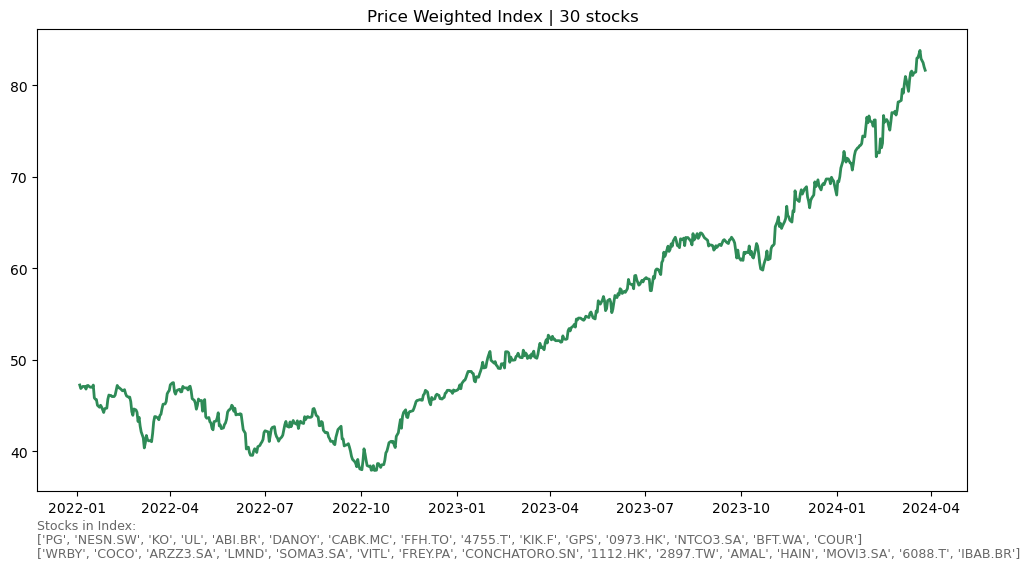

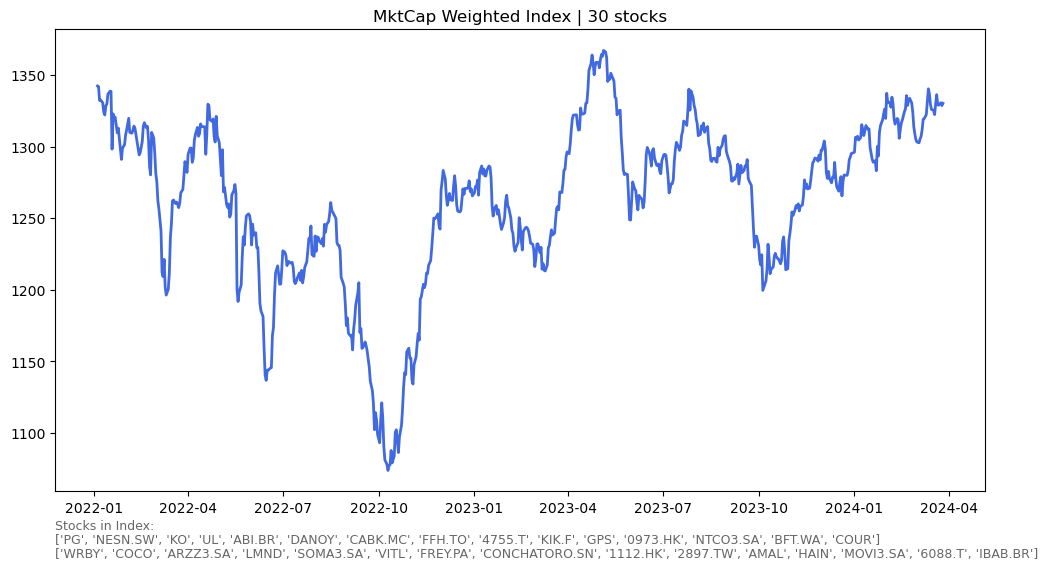

,PG_px_USD,NESN.SW_px_USD,KO_px_USD,UL_px_USD,ABI.BR_px_USD,DANOY_px_USD,CABK.MC_px_USD,FFH.TO_px_USD,4755.T_px_USD,KIK.F_px_USD,...,FREY.PA_px_USD,CONCHATORO.SN_px_USD,1112.HK_px_USD,2897.TW_px_USD,AMAL_px_USD,HAIN_px_USD,MOVI3.SA_px_USD,6088.T_px_USD,IBAB.BR_px_USD,Index
2022-01-04,154.584702,131.017429,56.316158,49.532364,61.793378,11.956317,2.273630,482.706591,10.224678,0.255742,...,32.907552,1.420335,1.363770,0.268931,16.284922,43.029999,2.389050,10.044670,16.449608,47.229968
2022-01-05,155.284500,130.555287,56.783195,49.440289,61.006310,11.872313,2.377102,480.356079,10.108526,0.261691,...,32.995116,1.472308,1.424883,0.269151,16.313683,42.639999,2.214387,9.469420,16.515430,46.847471
2022-01-06,153.979477,128.696228,56.484287,48.952335,61.292753,11.900314,2.436628,487.648431,9.865980,0.245525,...,32.946883,1.492238,1.394344,0.269355,16.773760,42.509998,2.216285,9.453631,16.227075,46.964657
2022-01-07,153.894363,128.696228,56.353523,49.532364,61.292753,11.928314,2.436628,492.092618,9.865980,0.245525,...,32.946883,1.497831,1.394344,0.269355,16.754589,42.470001,2.191904,9.453631,16.227075,47.076797
2022-01-09,153.894363,126.380363,56.353523,49.532364,62.986228,11.928314,2.506505,492.092618,9.865980,0.246749,...,32.910492,1.497831,1.419804,0.270424,16.754589,42.470001,2.191904,9.453631,16.263733,47.068676


,PG_MktCap_USD,NESN.SW_MktCap_USD,KO_MktCap_USD,UL_MktCap_USD,ABI.BR_MktCap_USD,DANOY_MktCap_USD,CABK.MC_MktCap_USD,FFH.TO_MktCap_USD,4755.T_MktCap_USD,KIK.F_MktCap_USD,...,FREY.PA_MktCap_USD,CONCHATORO.SN_MktCap_USD,1112.HK_MktCap_USD,2897.TW_MktCap_USD,AMAL_MktCap_USD,HAIN_MktCap_USD,MOVI3.SA_MktCap_USD,6088.T_MktCap_USD,IBAB.BR_MktCap_USD,Index
2022-01-04,3.740378e+11,3.434373e+11,2.440883e+11,1.252827e+11,1.225233e+11,3.842330e+10,1.676286e+10,1.143546e+10,2.191373e+10,2.448613e+08,...,1.041975e+09,1.067680e+09,8.803967e+08,7.356938e+08,4.968432e+08,3.975077e+09,9.161051e+08,4.393770e+08,4.966531e+08,1342.335571
2022-01-05,3.757310e+11,3.422259e+11,2.461126e+11,1.250498e+11,1.209627e+11,3.815334e+10,1.752573e+10,1.137978e+10,2.166479e+10,2.505576e+08,...,1.044747e+09,1.106748e+09,9.198492e+08,7.362959e+08,4.977207e+08,3.939049e+09,8.491290e+08,4.142142e+08,4.986405e+08,1341.944435
2022-01-06,3.725734e+11,3.373527e+11,2.448170e+11,1.238156e+11,1.215307e+11,3.824333e+10,1.796460e+10,1.155254e+10,2.114497e+10,2.350791e+08,...,1.043220e+09,1.121730e+09,9.001343e+08,7.368516e+08,5.117573e+08,3.927040e+09,8.498565e+08,4.135236e+08,4.899343e+08,1332.183015
2022-01-07,3.723674e+11,3.373527e+11,2.442503e+11,1.252827e+11,1.215307e+11,3.833331e+10,1.796460e+10,1.165782e+10,2.114497e+10,2.350791e+08,...,1.043220e+09,1.125935e+09,9.001343e+08,7.368516e+08,5.111725e+08,3.923345e+09,8.405076e+08,4.135236e+08,4.899343e+08,1332.559149
2022-01-09,3.723674e+11,3.312821e+11,2.442503e+11,1.252827e+11,1.248885e+11,3.833331e+10,1.847978e+10,1.165782e+10,2.114497e+10,2.362513e+08,...,1.042068e+09,1.125935e+09,9.165701e+08,7.397766e+08,5.111725e+08,3.923345e+09,8.405076e+08,4.135236e+08,4.910411e+08,1330.585654


In [123]:
price_wgt_index = calc_px_weighted_index(daily_px_USD, show_chart=True)
mktcap_wgt_index = calc_MC_weighted_index (daily_MC_USD, divisor = 1000000000, show_chart=True)

display(price_wgt_index.head())
display(mktcap_wgt_index.head())


In [124]:
download = False
if download:
    price_wgt_index.to_csv("PriceWgt_Index.csv")
    mktcap_wgt_index.to_csv("MarketCap_of_Index.csv")

In [125]:
def combine_norm_and_benchmark(px_df, mc_df):
    
    combined_df = pd.concat([px_df['Index'],mc_df['Index']], axis=1)
    combined_df.columns = ['Price Weighted Index', "Mkt Cap Weighted Index"]
    
    # Add S&P
    spx_object = yf.Ticker("^GSPC")
    spx = pd.DataFrame.from_dict(spx_object.history(start=s, end=e, interval = "1d"))
    spx = spx[['Close']]
    spx.columns = ['SPX']
    spx.index = pd.to_datetime(spx.index).date
    
    # Add Russell 2000
    ru2000_object = yf.Ticker("^RUT")
    ru2000 = pd.DataFrame.from_dict(ru2000_object.history(start=s, end=e, interval = "1d"))
    ru2000 = ru2000[['Close']]
    ru2000.columns = ['RU2000']
    ru2000.index = pd.to_datetime(ru2000.index).date
    
    # Add DJ Sustainability
    #DJsus_object = pd.read_csv("DJSus_history.csv")
    #display(DJsus_object.head())
    #DJsus_object.index = pd.to_datetime(DJsus_object['Date'])
    #DJsus_object.drop(['Date'], axis=1, inplace=True)
    #DJsus_object.index = pd.to_datetime(DJsus_object.index).date
    #DJ_Sus = DJsus_object.copy()

    combined_df = pd.concat([combined_df, spx, ru2000], axis=1)
    
    combined_df = combined_df.ffill()
    display(combined_df.head())

    combined_df = combined_df.div(combined_df.iloc[0])
    return combined_df


In [126]:
## Contain SPX, RU2000, DJ Sus separately for graphing

spx_object = yf.Ticker("^GSPC")
spx = pd.DataFrame.from_dict(spx_object.history(start=s, end=e, interval = "1d"))
spx = spx[['Close']]
spx.columns = ['SPX']
spx.index = pd.to_datetime(spx.index).date


ru2000_object = yf.Ticker("^RUT")
ru2000 = pd.DataFrame.from_dict(ru2000_object.history(start=s, end=e, interval = "1d"))
ru2000 = ru2000[['Close']]
ru2000.columns = ['RU2000']
ru2000.index = pd.to_datetime(ru2000.index).date

'''
DJsus_object = pd.read_csv("DJSus_history.csv")
#display(DJsus_object.head())
DJsus_object.index = pd.to_datetime(DJsus_object['Date'])
DJsus_object.drop(['Date'], axis=1, inplace=True)
DJsus_object.index = pd.to_datetime(DJsus_object.index).date
#display(DJsus_object.head())
'''

'\nDJsus_object = pd.read_csv("DJSus_history.csv")\n#display(DJsus_object.head())\nDJsus_object.index = pd.to_datetime(DJsus_object[\'Date\'])\nDJsus_object.drop([\'Date\'], axis=1, inplace=True)\nDJsus_object.index = pd.to_datetime(DJsus_object.index).date\n#display(DJsus_object.head())\n'

In [127]:
index_comparison_df = combine_norm_and_benchmark(price_wgt_index, mktcap_wgt_index)

,Price Weighted Index,Mkt Cap Weighted Index,SPX,RU2000
2022-01-04,47.229968,1342.335571,4793.540039,2268.870117
2022-01-05,46.847471,1341.944435,4700.580078,2194.000000
2022-01-06,46.964657,1332.183015,4696.049805,2206.370117
2022-01-07,47.076797,1332.559149,4677.029785,2179.810059
2022-01-09,47.068676,1330.585654,4677.029785,2179.810059


In [128]:
index_comparison_df.head(5)

,Price Weighted Index,Mkt Cap Weighted Index,SPX,RU2000
2022-01-04,1.000000,1.000000,1.000000,1.000000
2022-01-05,0.991901,0.999709,0.980607,0.967001
2022-01-06,0.994383,0.992437,0.979662,0.972453
2022-01-07,0.996757,0.992717,0.975694,0.960747
2022-01-09,0.996585,0.991247,0.975694,0.960747


In [129]:
index_comparison_df.sort_index(inplace=True)

## Preview and adjust dates if needed

In [130]:
display(index_comparison_df.head(5))

,Price Weighted Index,Mkt Cap Weighted Index,SPX,RU2000
2022-01-03,1.728350,0.990971,1.000630,1.001626
2022-01-04,1.000000,1.000000,1.000000,1.000000
2022-01-05,0.991901,0.999709,0.980607,0.967001
2022-01-06,0.994383,0.992437,0.979662,0.972453
2022-01-07,0.996757,0.992717,0.975694,0.960747


In [131]:
adjust = 115

In [132]:
if adjust > 0:
    index_comparison_df = index_comparison_df.iloc[adjust:,:]
display(index_comparison_df.head(5))

download = True
if download:
    index_comparison_df.to_csv("Index_Comparison.csv")

,Price Weighted Index,Mkt Cap Weighted Index,SPX,RU2000
2022-05-18,0.905348,0.894080,0.818535,0.782262
2022-05-19,0.907577,0.887775,0.813760,0.782865
2022-05-20,0.899030,0.892622,0.813879,0.781565
2022-05-22,0.900784,0.896333,0.813879,0.781565
2022-05-23,0.908608,0.910753,0.828980,0.790155


### Graph Indices

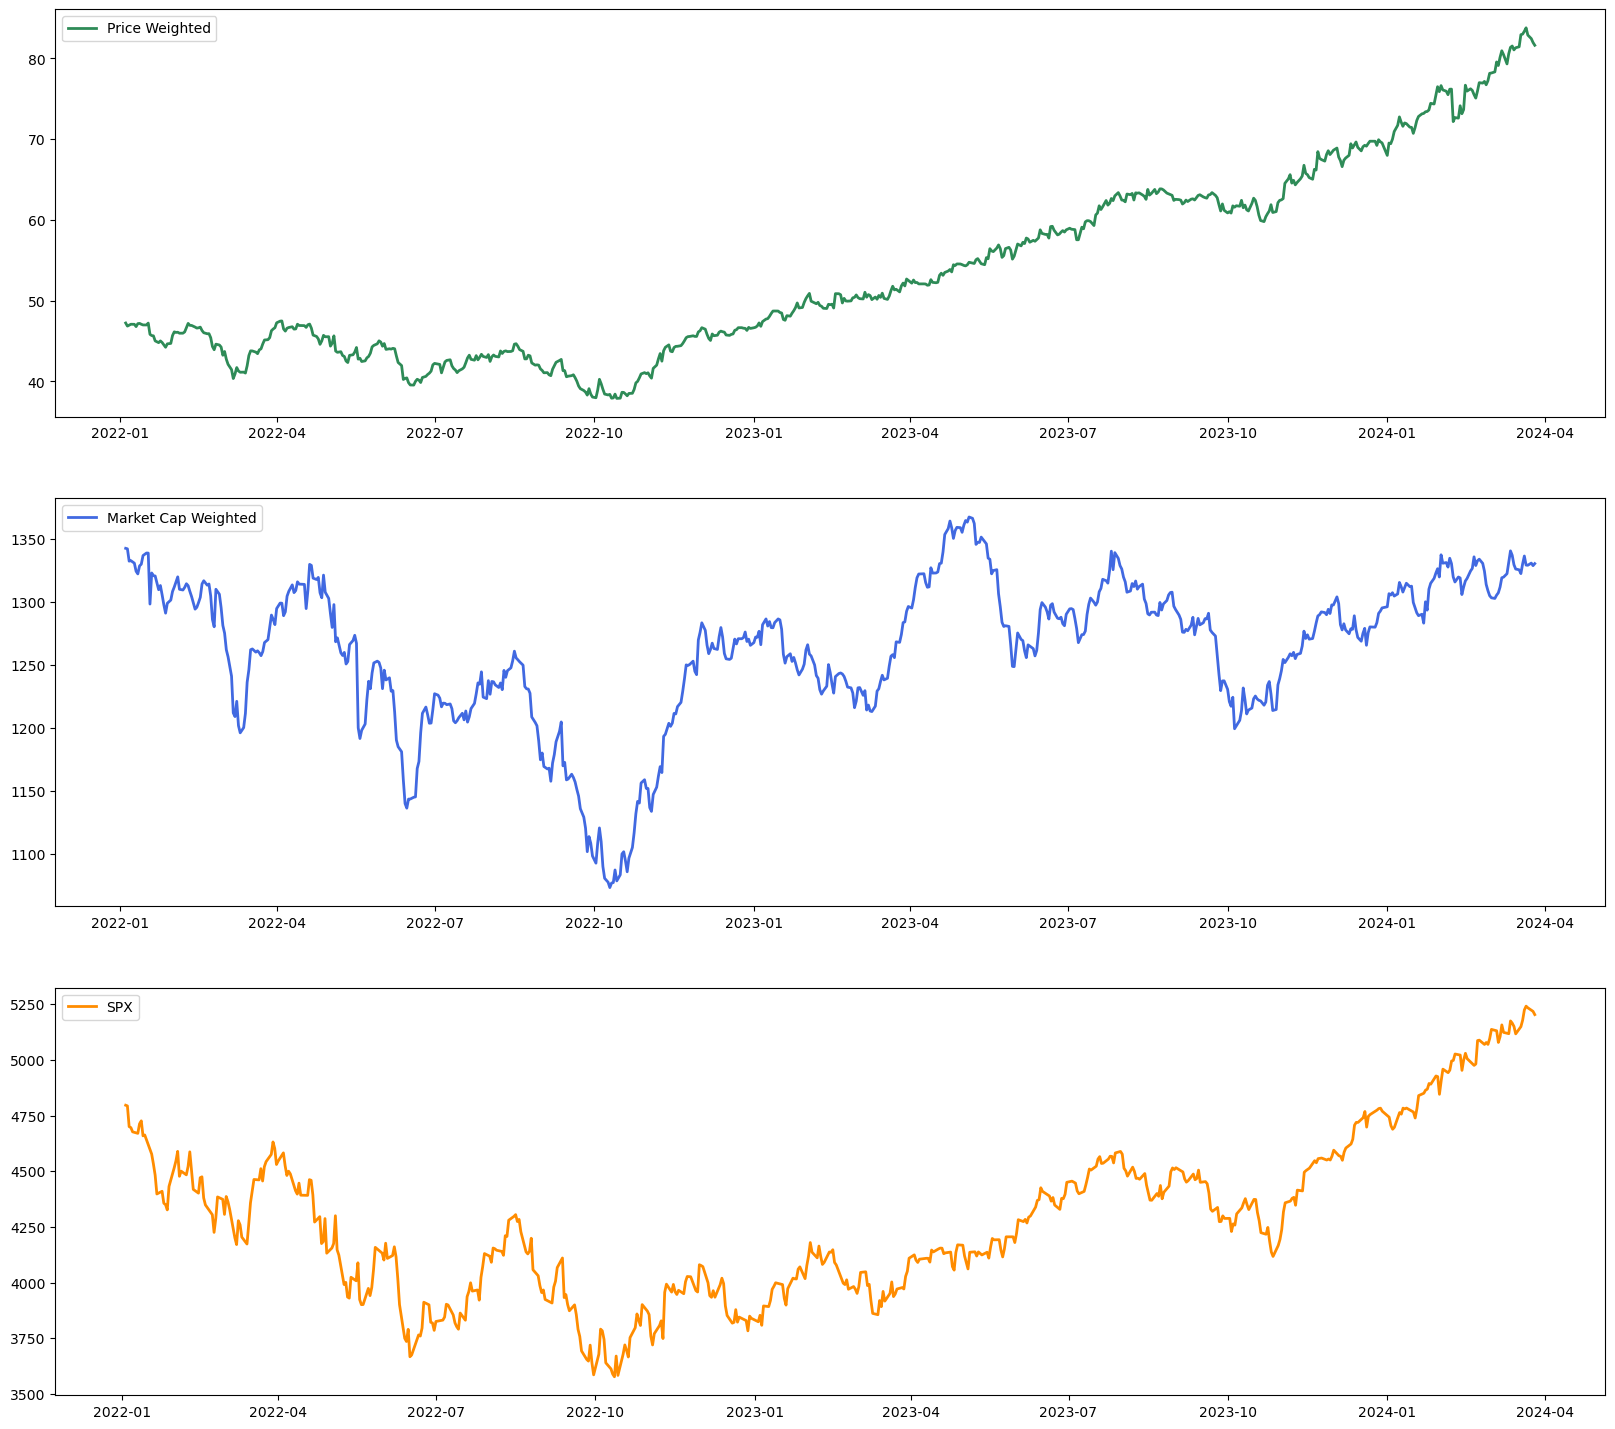

In [133]:
## Graph Separately
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize = (20,18))
ax0.plot(price_wgt_index['Index'], color = 'seagreen', linewidth=2, label = 'Price Weighted')
ax0.legend(loc=2)
ax1.plot(mktcap_wgt_index['Index'], color = 'royalblue', linewidth=2,label='Market Cap Weighted')
ax1.legend(loc=2)
ax2.plot(spx, color='darkorange', linewidth=2, label = 'SPX')
ax2.legend(loc=2)
plt.show()

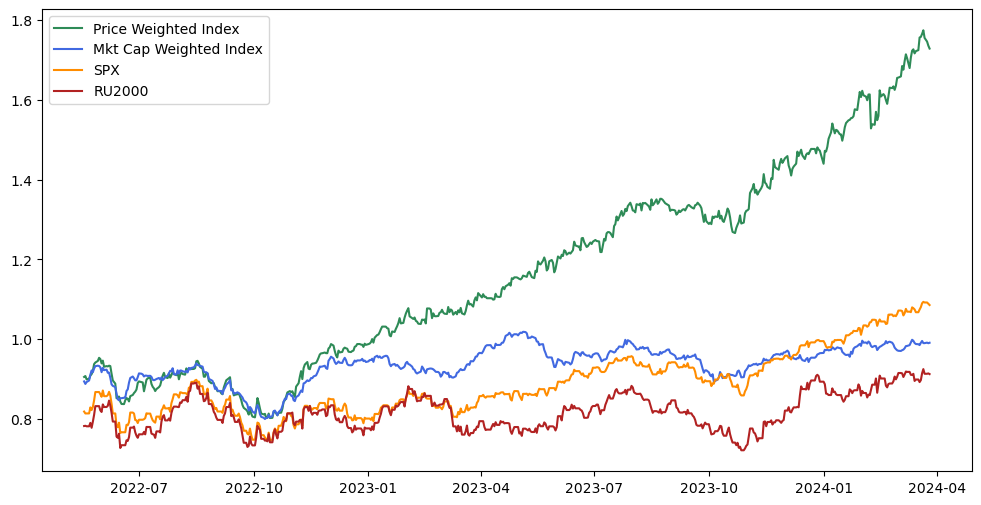

In [134]:
## Graph Together
#fig, ax = plt.subplots(figsize = (12,6))
index_comparison_df.plot(figsize = (12,6),
                         color = ['seagreen', 'royalblue', 'darkorange', 'firebrick', 'goldenrod'])

plt.show()

In [62]:
# Export Index:
#index_comparison_df.to_csv("Index_Comparison.csv")

Attributes = ['address1',
 'city',
 'state',
 'zip',
 'country',
 'phone',
 'website',
 'industry',
 'industryKey',
 'industryDisp',
 'sector',
 'sectorKey',
 'sectorDisp',
 'longBusinessSummary',
 'fullTimeEmployees',
 'companyOfficers',
 'auditRisk',
 'boardRisk',
 'compensationRisk',
 'shareHolderRightsRisk',
 'overallRisk',
 'governanceEpochDate',
 'compensationAsOfEpochDate',
 'maxAge',
 'priceHint',
 'previousClose',
 'open',
 'dayLow',
 'dayHigh',
 'regularMarketPreviousClose',
 'regularMarketOpen',
 'regularMarketDayLow',
 'regularMarketDayHigh',
 'beta',
 'forwardPE',
 'volume',
 'regularMarketVolume',
 'averageVolume',
 'averageVolume10days',
 'averageDailyVolume10Day',
 'bid',
 'ask',
 'bidSize',
 'askSize',
 'marketCap',
 'fiftyTwoWeekLow',
 'fiftyTwoWeekHigh',
 'priceToSalesTrailing12Months',
 'fiftyDayAverage',
 'twoHundredDayAverage',
 'currency',
 'enterpriseValue',
 'profitMargins',
 'floatShares',
 'sharesOutstanding',
 'sharesShort',
 'sharesShortPriorMonth',
 'sharesShortPreviousMonthDate',
 'dateShortInterest',
 'sharesPercentSharesOut',
 'heldPercentInsiders',
 'heldPercentInstitutions',
 'shortRatio',
 'shortPercentOfFloat',
 'impliedSharesOutstanding',
 'bookValue',
 'priceToBook',
 'lastFiscalYearEnd',
 'nextFiscalYearEnd',
 'mostRecentQuarter',
 'netIncomeToCommon',
 'trailingEps',
 'forwardEps',
 'pegRatio',
 'enterpriseToRevenue',
 'enterpriseToEbitda',
 '52WeekChange',
 'SandP52WeekChange',
 'exchange',
 'quoteType',
 'symbol',
 'underlyingSymbol',
 'shortName',
 'longName',
 'firstTradeDateEpochUtc',
 'timeZoneFullName',
 'timeZoneShortName',
 'uuid',
 'messageBoardId',
 'gmtOffSetMilliseconds',
 'currentPrice',
 'targetHighPrice',
 'targetLowPrice',
 'targetMeanPrice',
 'targetMedianPrice',
 'recommendationMean',
 'recommendationKey',
 'numberOfAnalystOpinions',
 'totalCash',
 'totalCashPerShare',
 'ebitda',
 'totalDebt',
 'quickRatio',
 'currentRatio',
 'totalRevenue',
 'debtToEquity',
 'revenuePerShare',
 'returnOnAssets',
 'returnOnEquity',
 'freeCashflow',
 'operatingCashflow',
 'revenueGrowth',
 'grossMargins',
 'ebitdaMargins',
 'operatingMargins',
 'financialCurrency',
 'trailingPegRatio']